# Polynomial Regression

**Importing Necessary Files**

In [3]:
#importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

**Task 1: Import the 'Boston.csv' data file**

In [5]:
# write code here
#Load data
from sklearn.datasets import load_boston 
boston = load_boston()

column_names = [x.lower() for x in load_boston()['feature_names']]

data = pd.DataFrame(boston.data, columns = column_names)
data['price'] = boston.target

data.rename({"b": "black"}, axis=1, inplace=True)


**Task 2: Make a copy of data in 'df'**

In [6]:
# Write code here
df = data.copy() 

**Task 3: Display top 5 rows of data**

In [7]:
# Write code here
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


### Creating Independent and Dependent Variables

**Task 4: Create Independent and Dependent variables in 'X' and 'Y' and print their respective shapes.**

In [8]:
# Write code here
X = df.drop(['price'], axis=1)
Y = df[['price']]
print(f'Independent Variable Shape = {X.shape}')
print(f'Dependent Variable Sahpe =  {Y.shape}')

Independent Variable Shape = (506, 13)
Dependent Variable Sahpe =  (506, 1)


### Normalizing Data

**Task 5: Normalize the data by applying MinMax Scaling on X.**

In [9]:
# Write code here

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)

X = pd.DataFrame(x_scaled_minmax, columns = column_names)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00,0.18,0.07,0.00,0.31,0.58,0.64,0.27,0.00,0.21,0.29,1.00,0.09
1,0.00,0.00,0.24,0.00,0.17,0.55,0.78,0.35,0.04,0.10,0.55,1.00,0.20
2,0.00,0.00,0.24,0.00,0.17,0.69,0.60,0.35,0.04,0.10,0.55,0.99,0.06
3,0.00,0.00,0.06,0.00,0.15,0.66,0.44,0.45,0.09,0.07,0.65,0.99,0.03
4,0.00,0.00,0.06,0.00,0.15,0.69,0.53,0.45,0.09,0.07,0.65,1.00,0.10


### Splitting Data

**Task 6: Split the data into training and testing set and print their shapes.**

In [10]:
# Write code here
from sklearn.model_selection import train_test_split

xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

In [11]:
print(f'Training Data:\t X_train = {xtrain.shape}\t Y_train = {ytrain.shape}')
print(f'Testing Data:\t X_test = {xtest.shape}\t Y_test = {ytest.shape}')

Training Data:	 X_train = (354, 13)	 Y_train = (354, 1)
Testing Data:	 X_test = (152, 13)	 Y_test = (152, 1)


### Applying Linear Regression

**Task 7: Apply Linear Regression on the data.**

In [12]:
#Write the code here
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

Apply the fit() function on the model

In [13]:
#Write code here
model.fit(xtrain, ytrain)

LinearRegression()

**Get the predicted values on training data set in train_pred**

In [16]:
#Write code here
train_pred = model.predict(xtrain)

**Get the predicted values on test data set in test_pred**

In [17]:
#Write code here
test_pred= model.predict(xtest)

### Finding R2 Score

**Task 8: Find out r2 Score for training and testing data.**

In [18]:
#Write code here for testing data
from sklearn.metrics import r2_score
r2_test_lr=r2_score(ytrain,train_pred)
r2_test_lr

0.7434997532004697

In [19]:
#Write code here for training data
r2_train_lr=r2_score(ytest,test_pred)
r2_train_lr

0.7112260057484925

**Ploting Residual Plot**

In [ ]:
#!pip install yellowbrick

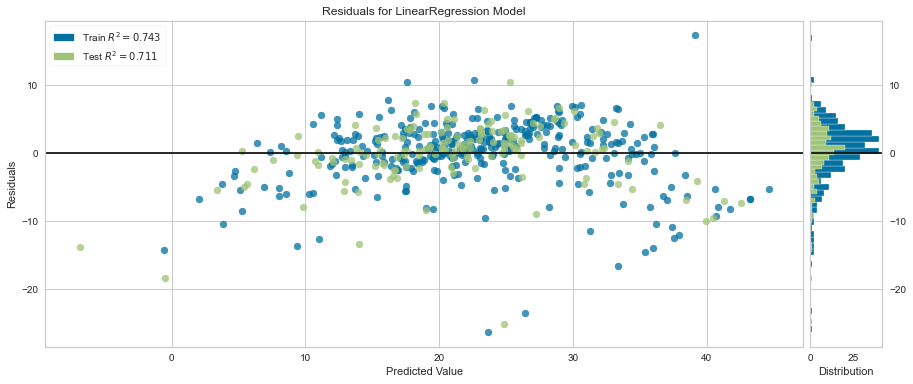

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(model)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    

# Applying Polynomial Regression 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_features = PolynomialFeatures(degree=2)

In [25]:
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(xtrain)

In [26]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, ytrain)

LinearRegression()

In [27]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [29]:
# predicting on test data-set
X_test_poly=poly_features.fit_transform(xtest)

y_test_predict = poly_model.predict(X_test_poly)

In [31]:
# evaluating the model on training dataset
r2_train = r2_score(ytrain, y_train_predicted)
r2_train

0.9469794920108198

In [32]:
# evaluating the model on test dataset
r2_test = r2_score(ytest, y_test_predict)
r2_test

0.66103219688773

In [33]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.9469794920108198
The r2 score for testing set is:  0.66103219688773


# Model Complexity vs Performance

In [34]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
mse_train=[]
mse_test=[]
mse_cv=[]
r2_train=[]
r2_test=[]
r2_cv=[]
for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    
    mse_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5,scoring=make_scorer(mean_squared_error))
    r2_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5)
    
    r2_train.append(r2_score(ytrain, y_tr_predicted))
    r2_test.append(r2_score(ytest, y_tst_predict))
    r2_cv.append(r2_cv_scores.mean())
    
    mse_train.append(mean_squared_error(ytrain, y_tr_predicted))
    mse_test.append(mean_squared_error(ytest, y_tst_predict))
    mse_cv.append(mse_cv_scores.mean())

### Comparison of R2 Score

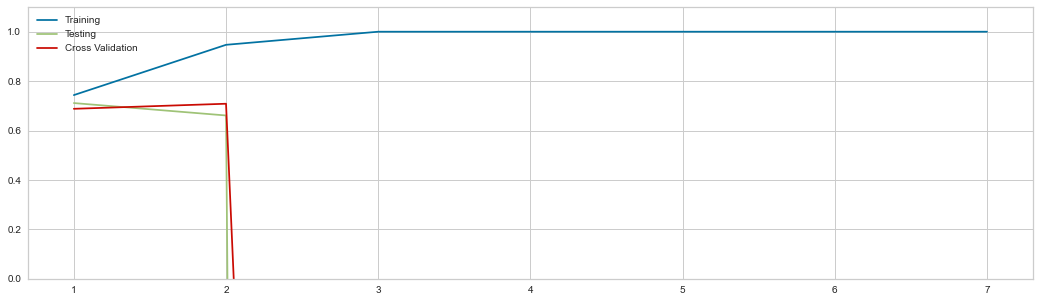

In [35]:
plt.figure(figsize=(18,5))
sns.lineplot(x=list(range(1,8)), y=r2_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=r2_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=r2_cv, label='Cross Validation')
plt.ylim(0,1.1)
plt.show()

### Comparison of Mean Squared Error

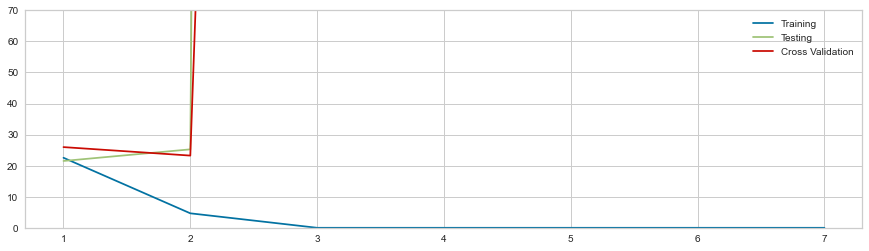

In [36]:
plt.figure(figsize=(15,4))
sns.lineplot(x=list(range(1,8)), y=mse_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=mse_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=mse_cv, label='Cross Validation')
plt.ylim(0,70)
plt.show();